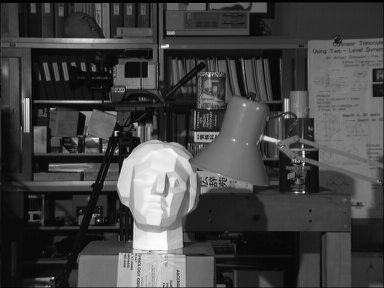

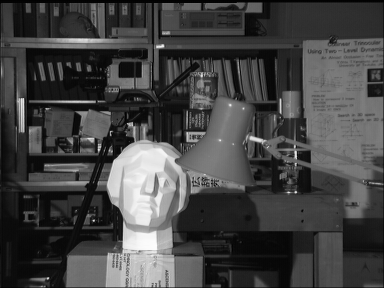

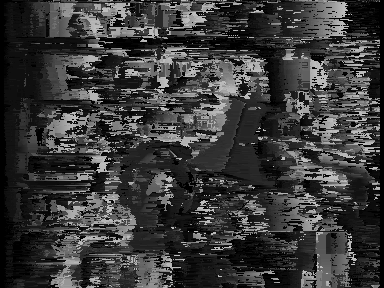

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
def compute_disparity_map(left_img, right_img, max_disparity, block_size):
    height, width = left_img.shape
    disparity_map = np.zeros((height, width), np.uint8)

    # Cost matrix
    cost = np.zeros((height, width, max_disparity))

    for d in range(max_disparity):
        right_shifted = np.roll(right_img, d, axis=1)
        abs_diff = np.abs(left_img - right_shifted)
        abs_diff[:, :d] = 255
        cost[:, :, d] = abs_diff

    for y in range(height):
        for x in range(width):
            if x < block_size // 2 or x >= width - block_size // 2:
                continue
            min_cost = float('inf')
            min_d = 0
            for d in range(max_disparity):
                cost_block = cost[y, x - block_size // 2:x + block_size // 2 + 1, d].sum()
                if cost_block < min_cost:
                    min_cost = cost_block
                    min_d = d
            disparity_map[y, x] = min_d * (255 // max_disparity)

    return disparity_map

left_img = cv2.imread('/content/drive/MyDrive/tsukuba_l.png', cv2.IMREAD_GRAYSCALE)
right_img = cv2.imread('/content/drive/MyDrive/tsukuba_r.png', cv2.IMREAD_GRAYSCALE)
cv2_imshow(left_img)
cv2_imshow(right_img)
max_disparity = 64
block_size = 9

disparity_map = compute_disparity_map(left_img, right_img, max_disparity, block_size)

cv2_imshow(disparity_map)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
